<a href="https://colab.research.google.com/github/KerollinDiniz/Estat-stica-com-Python/blob/main/Kerollin_Nogueira_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o_Simples_Multivariada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## graficos
import seaborn as sns ## graficos
from scipy.stats import skewnorm ## Gerar distribuicoes assimétricas, etc (utilizado na montagem do dataset)
from google.colab import drive ## conectar com o google drive para ler seus arquivos
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import statsmodels.api as sm ## regressao
from statsmodels.formula.api import ols ## ordinary least squares
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df_house = pd.read_csv('/content/drive/MyDrive/Desafios Bootcamp WoMekersCode/kc_house.csv')

In [ ]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00000,3,1.00000,1180,5650,1.00000,n,0,...,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,20141209T000000,538000.00000,3,2.25000,2570,7242,2.00000,n,0,...,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,20150225T000000,180000.00000,2,1.00000,770,10000,1.00000,n,0,...,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,20141209T000000,604000.00000,4,3.00000,1960,5000,1.00000,n,0,...,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,20150218T000000,510000.00000,3,2.00000,1680,8080,1.00000,n,0,...,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [ ]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

Considerando a base de dados kc_house_data.csv responda as questões de 1 a 6 abaixo:
**1. Codifique e exiba a matriz de correlação entre as variáveis numéricas. Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pésquadrados?**

In [ ]:
df_house['bathrooms'].value_counts()

,count
bathrooms,
2.50000,2290
1.00000,1945
1.75000,1502
2.00000,955
2.25000,938
1.50000,713
2.75000,534
3.00000,332
3.50000,270


In [ ]:
correlacao = df_house.corr(numeric_only=True)
correlacao

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00000,0.00578,0.01385,0.00744,0.00042,-0.13251,0.01226,0.03530,-0.02174,0.01287,-0.00717,0.01373,0.01170,-0.01558,0.00172,0.00057,0.00008,-0.00407,-0.14658
price,0.00578,1.00000,0.29921,0.52119,0.70220,0.09072,0.27695,0.39873,0.04460,0.65110,0.60776,0.32609,0.03612,0.14275,-0.05460,0.29716,0.01579,0.58329,0.08681
bedrooms,0.01385,0.29921,1.00000,0.53945,0.57391,0.02893,0.21356,0.09077,0.02343,0.36096,0.46487,0.32382,0.16485,0.02751,-0.14644,0.00175,0.11042,0.37649,0.01995
bathrooms,0.00744,0.52119,0.53945,1.00000,0.76481,0.09127,0.49425,0.20568,-0.08903,0.66091,0.68631,0.31135,0.47910,0.07082,-0.20498,0.02769,0.21745,0.57934,0.09928
sqft_living,0.00042,0.70220,0.57391,0.76481,1.00000,0.16781,0.39280,0.29315,-0.04737,0.76353,0.86927,0.45763,0.32438,0.06857,-0.19190,0.06240,0.21729,0.75032,0.19284
sqft_lot,-0.13251,0.09072,0.02893,0.09127,0.16781,1.00000,0.02132,0.06446,-0.01932,0.12172,0.18488,0.00664,0.08861,-0.00341,-0.12682,-0.06915,0.22596,0.15867,0.69037
floors,0.01226,0.27695,0.21356,0.49425,0.39280,0.02132,1.00000,0.06225,-0.21736,0.46398,0.57296,-0.23665,0.40560,0.04130,-0.08108,0.04235,0.15467,0.32733,0.02402
view,0.03530,0.39873,0.09077,0.20568,0.29315,0.06446,0.06225,1.00000,0.04466,0.25571,0.17468,0.27830,-0.03896,0.11352,0.07296,-0.00391,-0.08159,0.28968,0.04455
condition,-0.02174,0.04460,0.02343,-0.08903,-0.04737,-0.01932,-0.21736,0.04466,1.00000,-0.12644,-0.14469,0.16449,-0.31309,-0.07497,-0.00512,-0.01665,-0.10529,-0.08821,-0.02518
grade,0.01287,0.65110,0.36096,0.66091,0.76353,0.12172,0.46398,0.25571,-0.12644,1.00000,0.76098,0.17446,0.43890,0.03694,-0.19437,0.11105,0.20529,0.73165,0.14077


In [ ]:
# Correlação entre o preço price e o número de quartos bedrooms
correlacao_price_bedrooms = df_house['price'].corr(df_house['bedrooms'])
correlacao_price_bedrooms

0.29920721616918206

In [ ]:
df_2000 = df_house[df_house['sqft_living']>2000]
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4461 entries, 1 to 9997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4461 non-null   int64  
 1   date           4461 non-null   object 
 2   price          4461 non-null   float64
 3   bedrooms       4461 non-null   int64  
 4   bathrooms      4461 non-null   float64
 5   sqft_living    4461 non-null   int64  
 6   sqft_lot       4461 non-null   int64  
 7   floors         4461 non-null   float64
 8   waterfront     4461 non-null   object 
 9   view           4461 non-null   int64  
 10  condition      4461 non-null   int64  
 11  grade          4461 non-null   int64  
 12  sqft_above     4461 non-null   int64  
 13  sqft_basement  4461 non-null   int64  
 14  yr_built       4461 non-null   int64  
 15  yr_renovated   4461 non-null   int64  
 16  zipcode        4461 non-null   int64  
 17  lat            4461 non-null   float64
 18  long         

In [ ]:
df_2000.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000,4461.00000
mean,4579167441.15109,718928.99978,3.87447,2.57784,2820.60614,21865.11455,1.62206,0.41246,3.43085,8.35351,2333.84981,486.75633,1975.80296,118.72383,98068.00583,47.56841,-122.18573,2433.46492,17490.50863
std,2878800285.07903,474580.60404,0.85255,0.64323,805.94869,55442.40741,0.49714,0.99360,0.65542,1.15672,846.94137,557.92474,26.36882,472.48822,50.86622,0.13374,0.13671,676.07725,34068.82835
min,1000102.00000,196000.00000,0.00000,0.00000,2005.00000,609.00000,1.00000,0.00000,2.00000,5.00000,1010.00000,0.00000,1900.00000,0.00000,98001.00000,47.17750,-122.51500,720.00000,1173.00000
25%,2111010340.00000,449900.00000,3.00000,2.25000,2260.00000,6435.00000,1.00000,0.00000,3.00000,8.00000,1670.00000,0.00000,1961.00000,0.00000,98029.00000,47.48610,-122.29400,1960.00000,6291.00000
50%,3981200660.00000,620000.00000,4.00000,2.50000,2600.00000,9200.00000,2.00000,0.00000,3.00000,8.00000,2230.00000,160.00000,1980.00000,0.00000,98056.00000,47.58610,-122.18900,2360.00000,8745.00000
75%,7308600050.00000,825000.00000,4.00000,2.75000,3130.00000,15139.00000,2.00000,0.00000,4.00000,9.00000,2790.00000,935.00000,1998.00000,0.00000,98108.00000,47.67330,-122.09200,2820.00000,13200.00000
max,9834200885.00000,7700000.00000,11.00000,8.00000,12050.00000,1074218.00000,3.50000,4.00000,5.00000,13.00000,8860.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77750,-121.41700,5790.00000,871200.00000


**2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?**

In [ ]:
df_bathrooms = df_house[df_house['bathrooms']>2]
df_bathrooms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4835 entries, 1 to 9992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4835 non-null   int64  
 1   date           4835 non-null   object 
 2   price          4835 non-null   float64
 3   bedrooms       4835 non-null   int64  
 4   bathrooms      4835 non-null   float64
 5   sqft_living    4835 non-null   int64  
 6   sqft_lot       4835 non-null   int64  
 7   floors         4835 non-null   float64
 8   waterfront     4835 non-null   object 
 9   view           4835 non-null   int64  
 10  condition      4835 non-null   int64  
 11  grade          4835 non-null   int64  
 12  sqft_above     4835 non-null   int64  
 13  sqft_basement  4835 non-null   int64  
 14  yr_built       4835 non-null   int64  
 15  yr_renovated   4835 non-null   int64  
 16  zipcode        4835 non-null   int64  
 17  lat            4835 non-null   float64
 18  long         

In [ ]:
# Correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pésquadrados?
correlacao_price_sqft_living_bathroom = round(df_bathrooms['price'].corr(df_bathrooms['sqft_living']), 4)
correlacao_price_sqft_living_bathroom

0.7091

**3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?**

In [ ]:
def correlacao_effect_bathrooms_n(df, n_bath):
  df_bath_n = df[df['bathrooms'] == n_bath]
  correlacao_price_sqft_living_bath_n = round(df_bath_n['price'].corr(df_bath_n['sqft_living']), 4)
  return correlacao_price_sqft_living_bath_n

In [ ]:
correlacao_effect_bathrooms_n(df_house, 2)

0.4469

In [ ]:
df_house['bathrooms'].max()

8.0

In [ ]:
for n_bath in range(0, int(df_house['bathrooms'].max())):
  print(f'Correlação price x sqft_living para {n_bath} banheiros: {correlacao_effect_bathrooms_n(df_house, n_bath)}')

Correlação price x sqft_living para 0 banheiros: 0.9168
Correlação price x sqft_living para 1 banheiros: 0.3595
Correlação price x sqft_living para 2 banheiros: 0.4469
Correlação price x sqft_living para 3 banheiros: 0.569
Correlação price x sqft_living para 4 banheiros: 0.5845
Correlação price x sqft_living para 5 banheiros: 0.7472
Correlação price x sqft_living para 6 banheiros: 1.0
Correlação price x sqft_living para 7 banheiros: nan


**4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pésquadrados?**

In [ ]:
casas_3000 = df_house[df_house['sqft_living'] > 3000]
correlacao_condition_price = casas_3000['condition'].corr(casas_3000['price'])

correlacao_condition_price

0.10527844723732609

**5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?**

In [ ]:
casas_com_3_quartos = df_house[df_house['bedrooms'] >= 3]
correlacao_lat_price = casas_com_3_quartos['lat'].corr(casas_com_3_quartos['price'])
correlacao_long_price = casas_com_3_quartos['long'].corr(casas_com_3_quartos['price'])

print(f"Correlação lat e price: {correlacao_lat_price}")
print(f"Correlação long e price: {correlacao_long_price}")

Correlação lat e price: 0.31255514248432165
Correlação long e price: -0.0072753069929269365


**6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.**

In [ ]:
# Realizar a ANOVA
model = ols('price ~ C(waterfront)', data=df_house).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [ ]:
anova_table

,sum_sq,df,F,PR(>F)
C(waterfront),125078955238696.31250,1.00000,964.57332,0.00000
Residual,1296339306997409.25000,9997.00000,NaN,NaN


In [ ]:
df_waterfront = df_house[df_house['waterfront']==1]
df_waterfront['price'].describe()

,price
count,0.00000
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
df_waterfront = df_house[df_house['waterfront']==0]
df_waterfront['price'].describe()

,price
count,0.00000
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


**Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:**

**7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.**

In [ ]:
df_car = pd.read_csv('/content/drive/MyDrive/Desafios Bootcamp WoMekersCode/car_price.csv')

In [ ]:
df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.00000,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.00000,1680.00000,1505.00000,5.00000,35.00000
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.00000,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.00000,1695.00000,1555.00000,5.00000,42.00000
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.00000,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.00000,1595.00000,1550.00000,5.00000,35.00000
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.00000,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.00000,1745.00000,1510.00000,5.00000,37.00000
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.00000,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.00000,1830.00000,1795.00000,7.00000,55.00000


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

In [ ]:
correlacao = df_car.corr(numeric_only=True)
correlacao

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Price,1.00000,0.30938,-0.14728,0.56887,0.57710,0.09297,-0.02488,0.58611
Year,0.30938,1.00000,-0.29174,0.08518,0.18222,0.12685,-0.00011,0.04486
Kilometer,-0.14728,-0.29174,1.00000,0.03782,0.00848,0.08573,0.11110,0.05245
Length,0.56887,0.08518,0.03782,1.00000,0.79723,0.19470,0.29853,0.80981
Width,0.57710,0.18222,0.00848,0.79723,1.00000,0.32693,0.22906,0.79132
Height,0.09297,0.12685,0.08573,0.19470,0.32693,1.00000,0.69537,0.40872
Seating Capacity,-0.02488,-0.00011,0.11110,0.29853,0.22906,0.69537,1.00000,0.31393
Fuel Tank Capacity,0.58611,0.04486,0.05245,0.80981,0.79132,0.40872,0.31393,1.00000


**8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.**

In [ ]:
# Filtrar colunas numéricas do dataframe
numeric_columns = df_car.select_dtypes(include=['number']).columns.tolist()
print(numeric_columns)

['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']


In [ ]:
numeric_columns

['Year',
 'Kilometer',
 'Length',
 'Width',
 'Height',
 'Seating Capacity',
 'Fuel Tank Capacity']

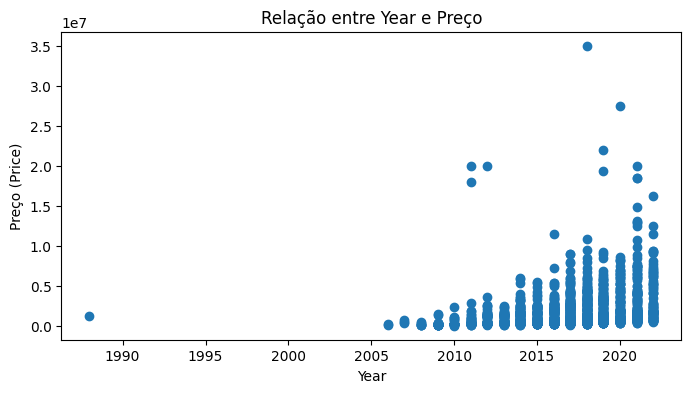

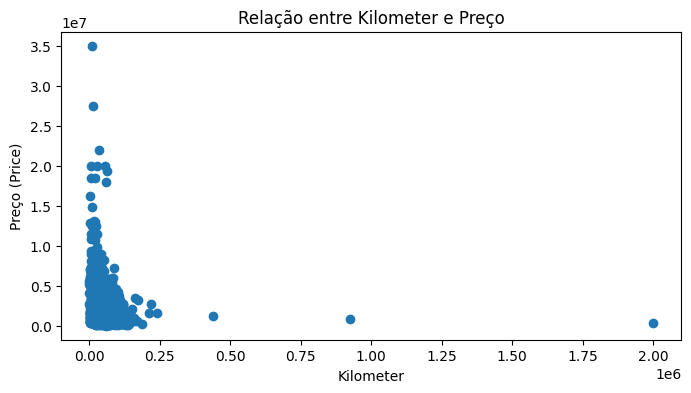

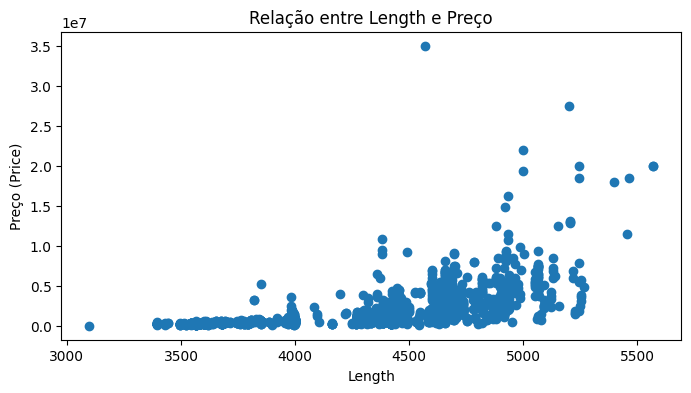

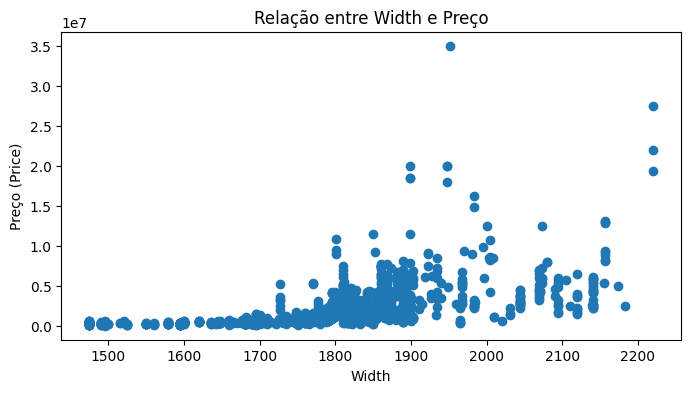

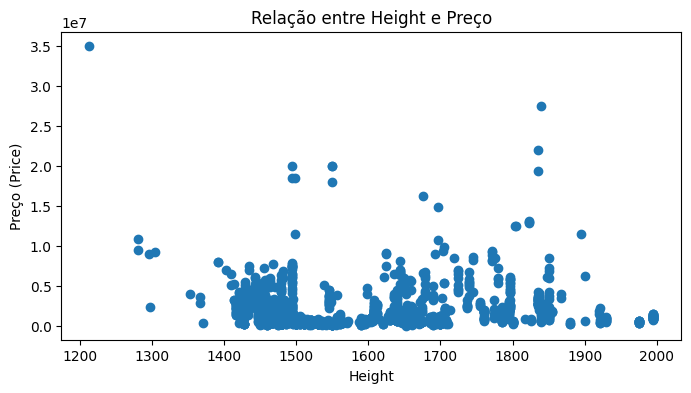

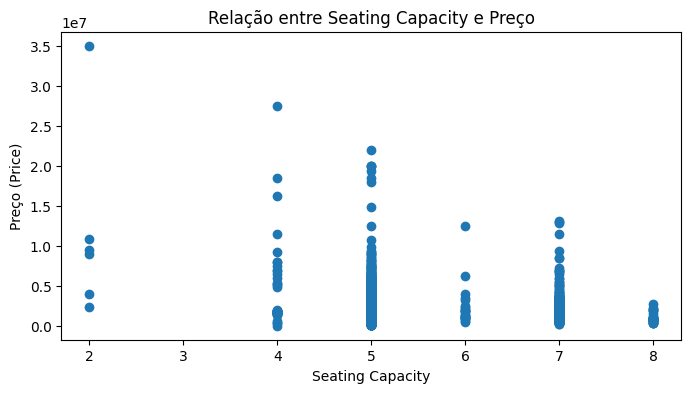

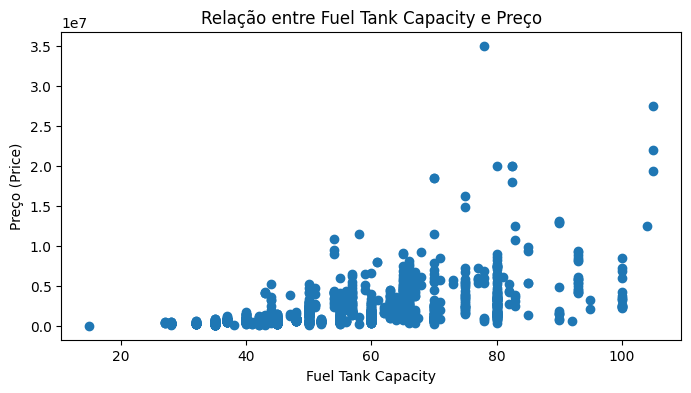

In [ ]:
for col in numeric_columns:
  plt.figure(figsize=(8, 4))
  plt.scatter(df_car[col], df_car['Price'])
  plt.xlabel(col)  # Nome do eixo x será o nome da coluna atual
  plt.ylabel('Preço (Price)')  # Nome do eixo y
  plt.title(f'Relação entre {col} e Preço')
  plt.show()

**9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.**

In [ ]:
df_car.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.00000,1680.00000,1505.00000,5.00000,35.00000


In [ ]:
# Definir X e Y
X = df_car['Year']
Y = df_car['Price']

In [ ]:
# Adicionar uma constante
X = sm.add_constant(X)

In [ ]:
# Ajustar o modelo
model = sm.OLS(Y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.335
Model:                            OLS   Adj. R-squared (uncentered):              0.334
Method:                 Least Squares   F-statistic:                              941.9
Date:                Wed, 09 Oct 2024   Prob (F-statistic):                   6.39e-168
Time:                        19:08:23   Log-Likelihood:                         -30209.
No. Observations:                1874   AIC:                                  6.042e+04
Df Residuals:                    1873   BIC:                                  6.043e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
df_car.head(1)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.00000,1680.00000,1505.00000,5.00000,35.00000


<Axes: xlabel='Kilometer', ylabel='Price'>

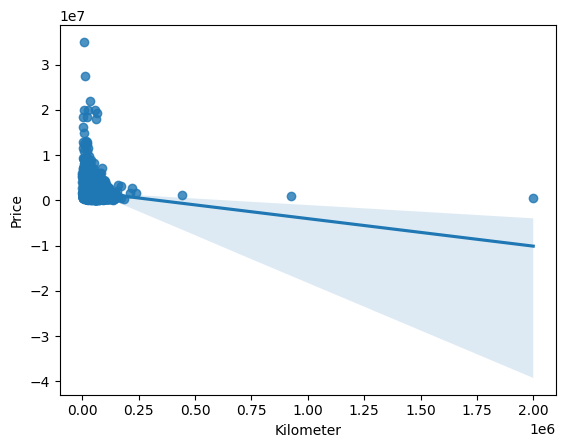

In [ ]:
# Plotar a regressão para uma variável:
var = 'Kilometer'
sns.regplot(x=var, y='Price', data=df_car)

**10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.**

In [ ]:
df_car['Engine'] = df_car['Engine'].str.replace(' cc', '').astype(float)


In [ ]:
X = df_car[['Engine']]
y = df_car['Price']

In [ ]:
print(df_car['Engine'].head())

0   1198.00000
1   1248.00000
2   1197.00000
3   1197.00000
4   2393.00000
Name: Engine, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
y_pred = model.predict(X)

# Calcular os resíduos
residuals = y - y_pred


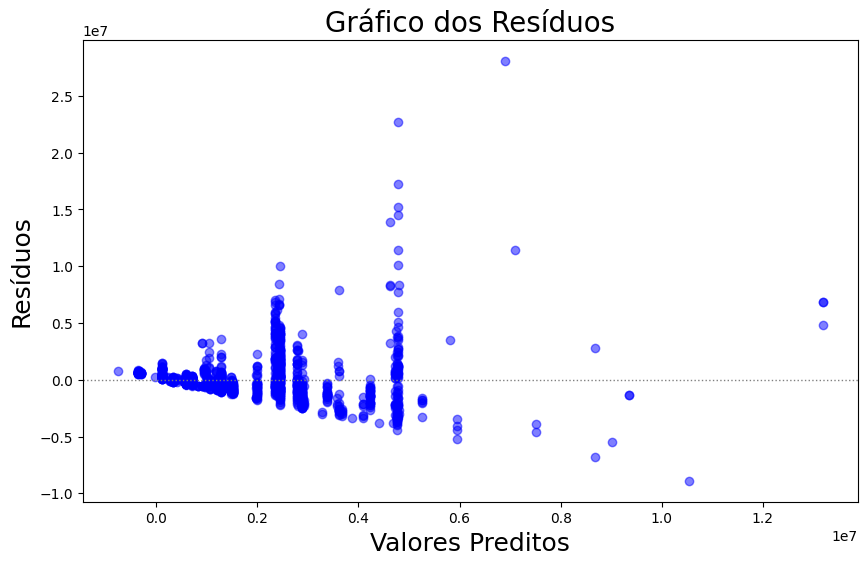

In [ ]:
# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='grey', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()

**11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.**

In [ ]:
X = sm.add_constant(df_car[numeric_columns])
Y = df_car['Price']

In [ ]:
mv_model = sm.OLS(Y, X).fit()
print(mv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Wed, 09 Oct 2024   Prob (F-statistic):          1.49e-278
Time:                        19:21:20   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

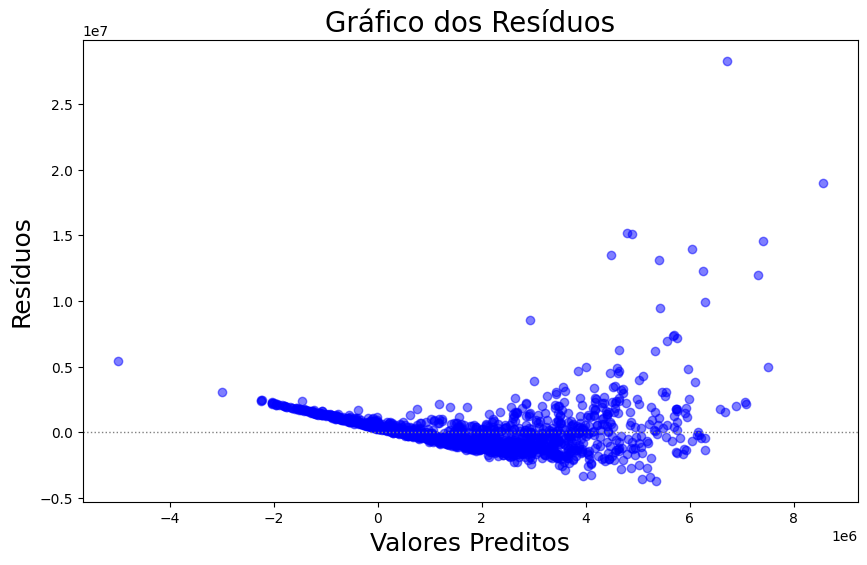

In [ ]:
# Calcular os valores preditos e os resíduos
y = mv_model.predict(X)
residuals = Y - y

# Plotar os resíduos
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='grey', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()